In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from tqdm import tqdm_notebook
import torch
import torchvision
import scipy.signal
from torch.utils.data import DataLoader, Subset
import sklearn.model_selection
import torch.nn.functional as F

import cv2
from torchvision import transforms, utils

In [5]:
transformations = transforms.Compose([
    transforms.Grayscale(),
    transforms.ToTensor(),
])

In [6]:
train_path = 'cachipun/train'

train_dataset = torchvision.datasets.ImageFolder(
    root=train_path,
    transform=transformations
)

train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=64,
    num_workers=0,
    shuffle=True
)

test_path = 'cachipun/test'

test_dataset = torchvision.datasets.ImageFolder(
    root=test_path,
    transform=transformations
)

test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=64,
    num_workers=0,
    shuffle=True
)

### Train a Convolutional Neural Network

#### Neural network Arquitechture

In [9]:
class conv_nn(torch.nn.Module):
    
    def __init__(self):
        
        super(conv_nn, self).__init__()
        
        # convolutation layer
        self.conv1 = torch.nn.Conv2d(1, 20, kernel_size = 3, stride = 1, padding = 1)
        
        # pooling
        self.maxpooling = torch.nn.MaxPool2d(kernel_size = 2, stride = 2)

        # activation function
        self.act = torch.nn.ReLU()
        
        # final layer
        self.output = torch.nn.Linear(768000, 10, bias = True)
        
        
    # forward method
    def forward(self, x):
        
        input_size = x.size(0)
        
#         print(x.size(0))
        
        x = self.conv1(x)
        
#         print('out conv: ', x.shape)
        
        x = self.act(x)
        
#         print('out activation: ', x.shape)
        
        x = self.maxpooling(x)
        
#         print('pooling: ', x.shape)
        
        # flatten
        x = x.view(input_size, -1)
        
#         print('out flatten: ', x.shape)
        
        x = self.output(x)
        
#         print('output: ',x.shape)
        
        x = F.log_softmax(x)
        
#         print('softmax out: ', x.shape)
        
        return x

#### Set configurations for NN

In [10]:
# define net
net = conv_nn()

# Define optimizer
optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)
criterion = torch.nn.NLLLoss()

### Train NN

In [12]:
# number of epochs
epochs = 20

for epoch in range(epochs):
    
    for data, label in train_loader:
        
#         print(data.shape)
        prediction = net(data)
        
        optimizer.zero_grad()  
#         print(label.shape)
#         print(prediction.shape)
        loss = criterion(prediction, label)  
               
        loss.backward()
        
        optimizer.step()

RuntimeError: size mismatch, m1: [64 x 1536000], m2: [768000 x 10] at /pytorch/aten/src/TH/generic/THTensorMath.cpp:961

In [7]:
# for epoch in range(epochs):
with torch.no_grad():
    
    correct = 0
    total = 0
    
    for data, label in test_loader:
        
#         print(data.shape)
        prediction = net(data)
#         print(prediction.shape)
#         optimizer.zero_grad()  
#         print(label.shape)
#         print(prediction.shape)
#         loss = criterion(prediction, label)  
               
        _, predicted = torch.max(prediction.data, 1)
        
        total += label.size(0)
        
        correct += (predicted == label.long()).sum().item()
        
    print('Accuracy: {0}'.format(correct/total*100))    
    

NameError: name 'net' is not defined

In [8]:
labels_names = ['papel', 'piedra', 'tijera']

/home/leo/Desktop/master_UACH/env/lib/python3.6/site-packages/ipykernel_launcher.py:48: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


tensor([[9.9996e-01, 3.9676e-05, 1.0498e-16, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]],
       grad_fn=<SoftmaxBackward>)

prediction:  papel
label:  tijera


Error




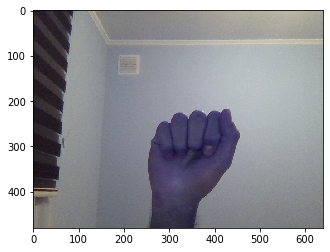

In [76]:
from cv2 import *

camera = cv2.VideoCapture(0)

return_value, image = camera.read()

fig, ax = plt.subplots()

ax.imshow(image, cmap = 'gray')

name = 'cachipun/new/tijera/new.jpg'

cv2.imwrite(name, image)

del(camera)

new_path = 'cachipun/new'

new_dataset = torchvision.datasets.ImageFolder(
    root= new_path,
    transform=transformations
)

image, label = new_dataset[0]
y = torch.nn.Softmax(dim=1)(net.forward(image.unsqueeze(0)))
display(y)
print('prediction: ', labels_names[torch.argmax(y)])
print('label: ', labels_names[label])

print('\n\nCorrect\n\n' if torch.argmax(y) == label else '\n\nError\n\n' )

# plt.figure()
# plt.imshow(image.numpy()[0, :, :], cmap=plt.cm.Greys_r)

os.remove(name)